# 기본 설정

In [2]:
import sys
assert sys.version_info >= (3, 5)

import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [3]:
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
import os
os.getcwd()

'c:\\Users\\USER\\Documents\\LGhv_practice\\ML'

In [5]:
file_path = 'C:\\Users\\USER\\Documents\\LGhv_practice\\resource\\ml\\data/'

In [6]:
# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

In [7]:
#이미지를 저장할 때 사용하기 위한 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
from matplotlib import font_manager, rc
import platform

#한글 출력을 위한 부분
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

#음수 출력을 위한 부분
mpl.rcParams['axes.unicode_minus'] = False

In [9]:
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

#그래픽 출력을 조금 더 고급화하기 위한 라이브러리
import seaborn as sns

#과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수: 0.20 에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경이 되서 훈령용 데이터가
# 자주 변경되면 결국 모든 데이터를 가지고 모델을 생성하는 결과
# Overfit이 될 가능성이 높아짐
np.random.seed(42)


# 정규 방정식

In [11]:
#샘플 데이터 생성
X = 2 * np.random.rand(100,1) #100개의 독립 변수 생성
y = 4 + 3 * X + np.random.randn(100,1) #100개의 종속 변수 생성

#모든 sample에 1 추가
X_b = np.c_[np.ones((100,1)), X]
#역행렬을 구하고(inv) 행렬 곱셉(dot)을 수행
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best #잡음 때문에 정확히 4,3은 나오지 X

array([[4.215],
       [2.77 ]])

In [12]:
#예측
X_new = np.array([[0],[2]])

X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.215],
       [9.755]])

# boston 주택 가격 예측 - 선형 회귀

In [29]:
#데이터 가져오기
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep = '\s+',skiprows = 22, header = None)
data = np.hstack([raw_df.values[::2,:], raw_df.values[1::2, :2]])
target = raw_df.values[1::2,2]

print(data)
print(target)

[[6.320e-03 1.800e+01 2.310e+00 ... 1.530e+01 3.969e+02 4.980e+00]
 [2.731e-02 0.000e+00 7.070e+00 ... 1.780e+01 3.969e+02 9.140e+00]
 [2.729e-02 0.000e+00 7.070e+00 ... 1.780e+01 3.928e+02 4.030e+00]
 ...
 [6.076e-02 0.000e+00 1.193e+01 ... 2.100e+01 3.969e+02 5.640e+00]
 [1.096e-01 0.000e+00 1.193e+01 ... 2.100e+01 3.934e+02 6.480e+00]
 [4.741e-02 0.000e+00 1.193e+01 ... 2.100e+01 3.969e+02 7.880e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.

In [30]:
# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX",
"RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])

bostonDF['PRICE'] = target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

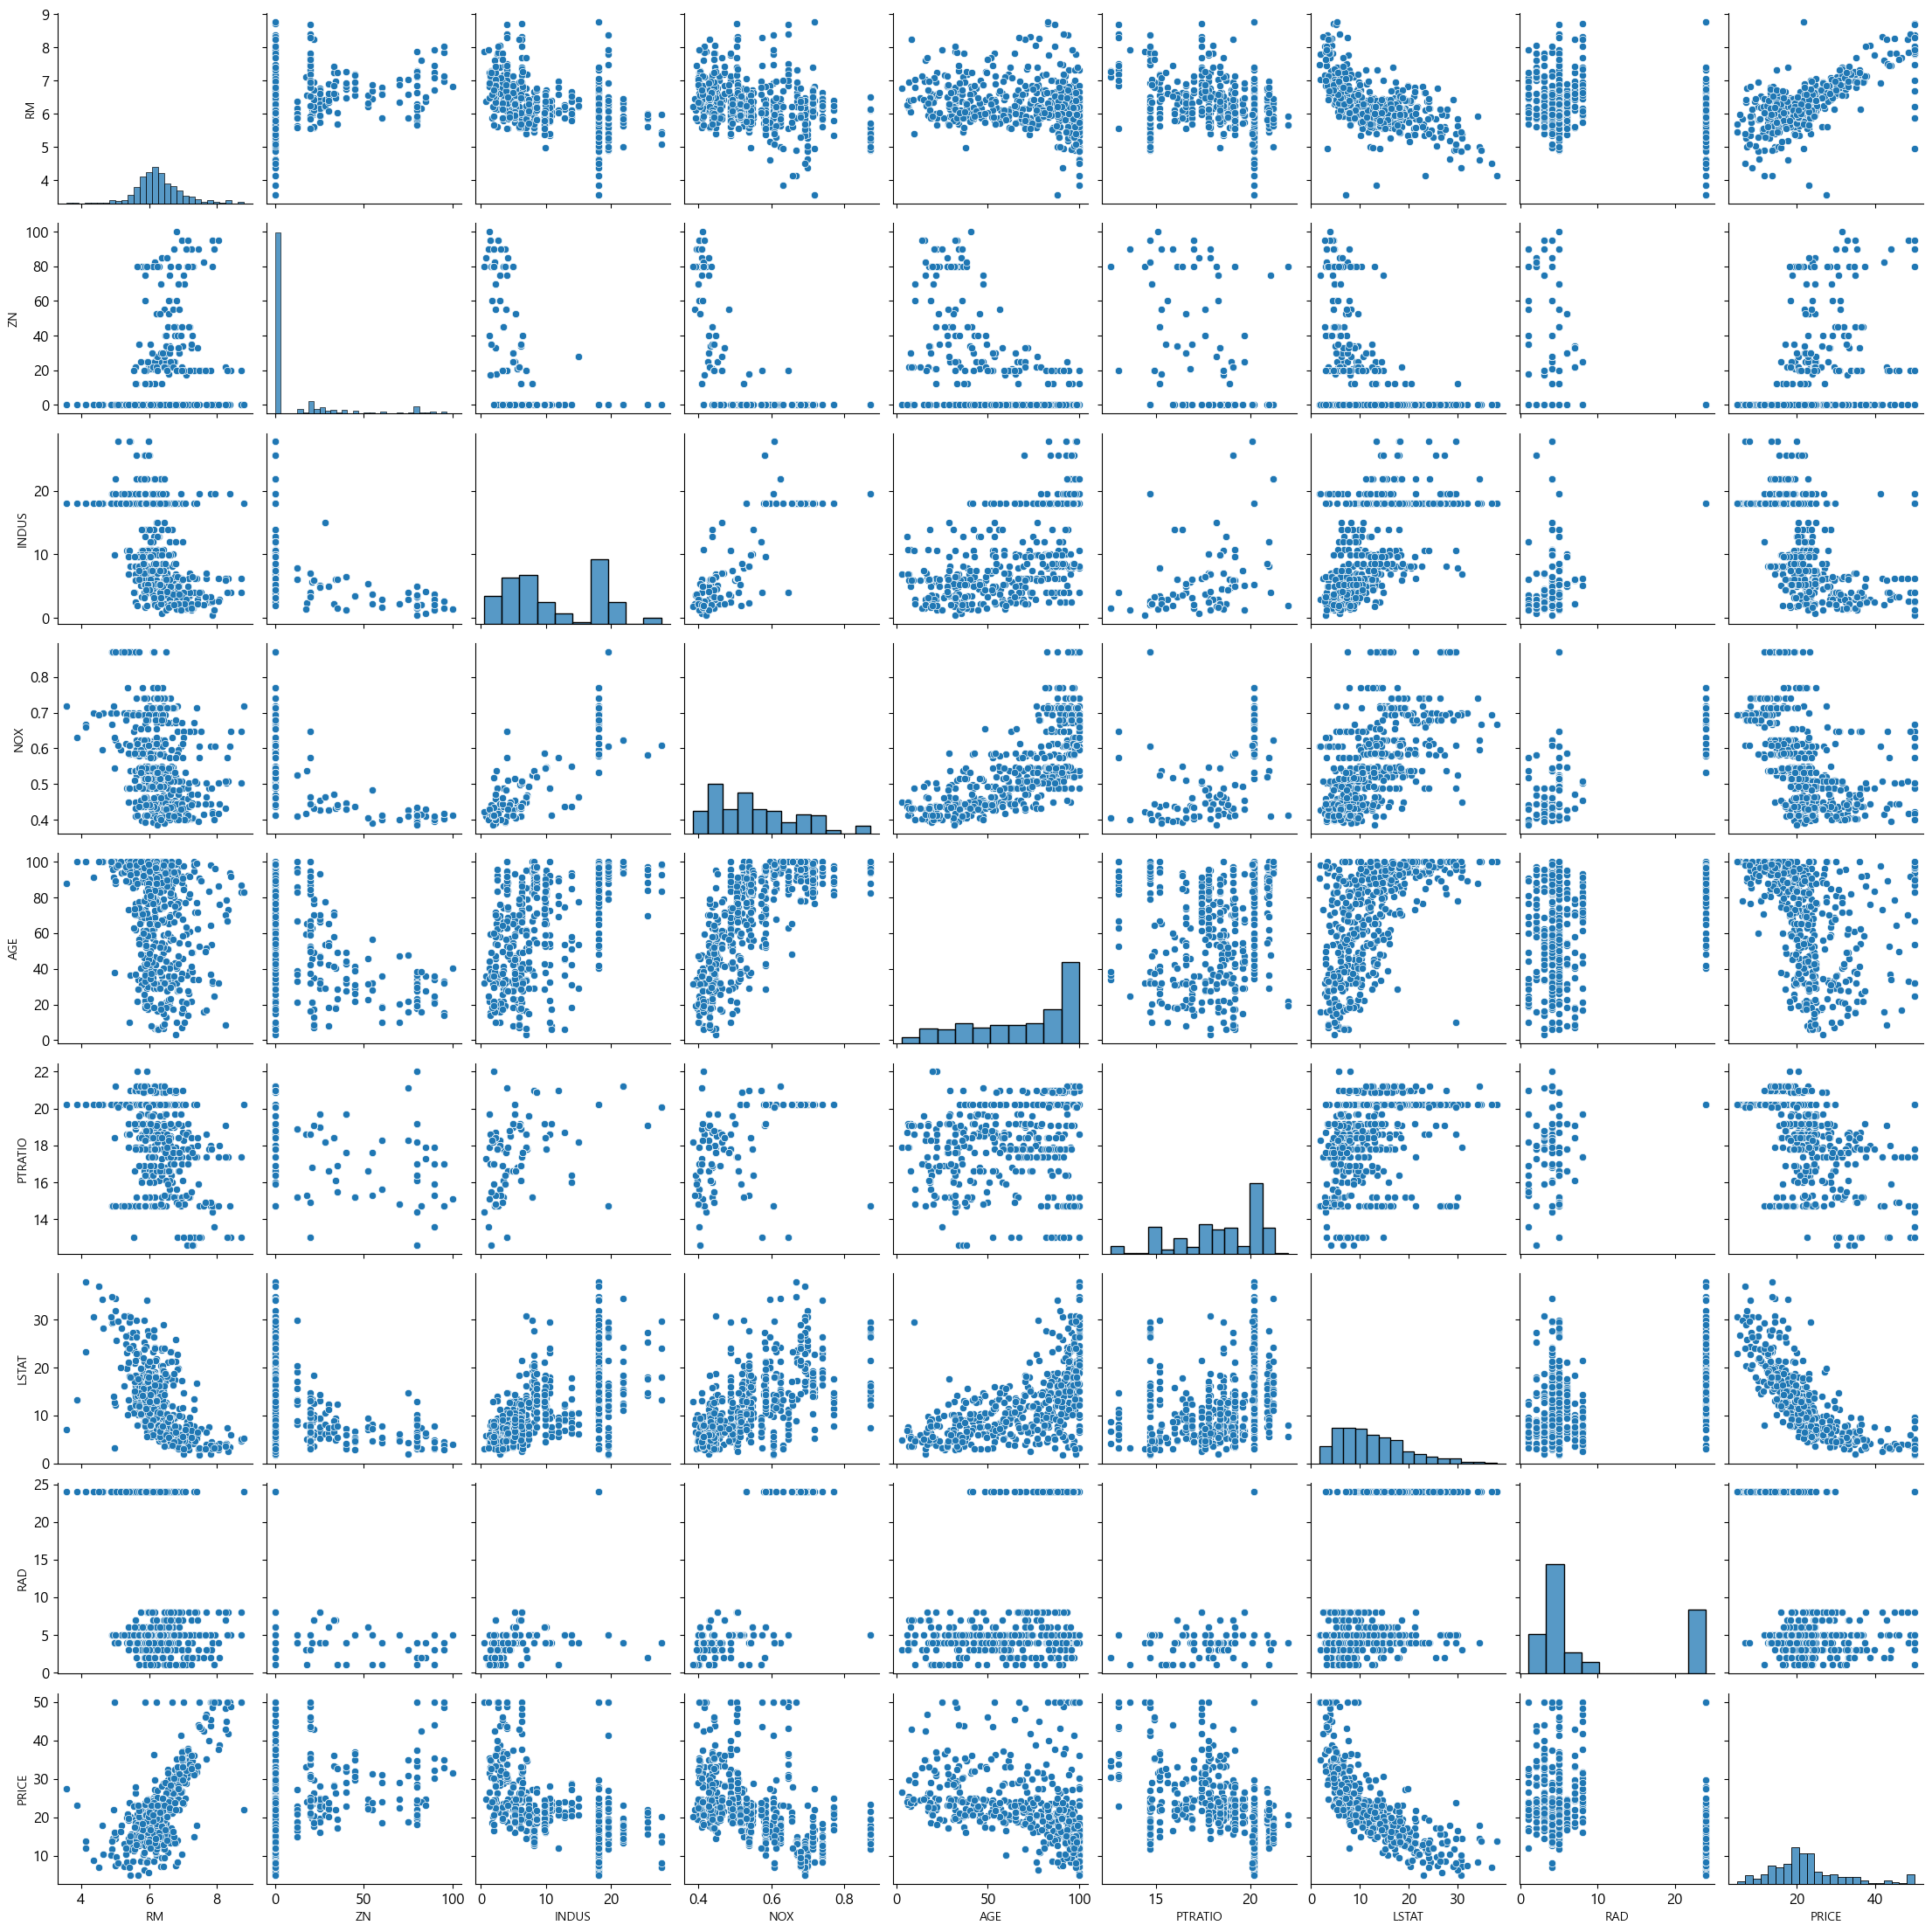

In [21]:
#상관 관계를 파악하고자 하는 열의 리스트
cols = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD','PRICE']
#bostonDF[cols].corr()

sns.pairplot(bostonDF[cols],height = 2.5)
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

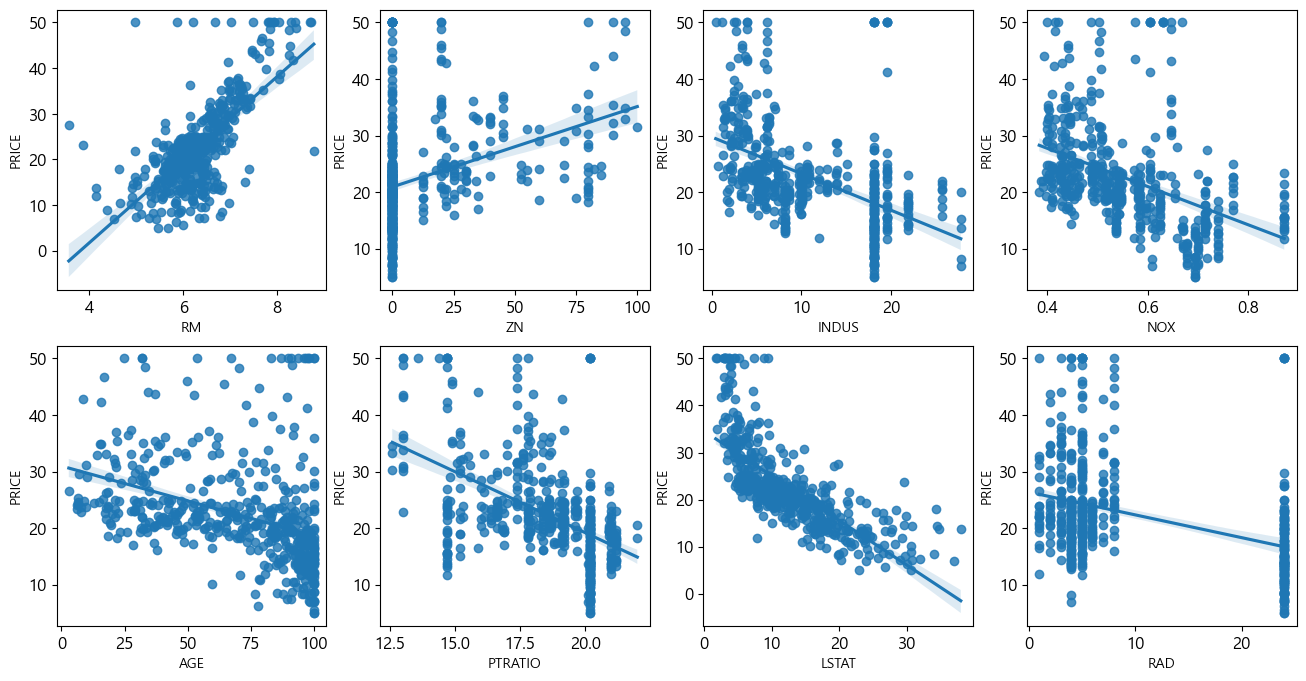

In [23]:
#y의 자리만 다른 컬럼이름으로 수정하면 그 컬럼과의 상관관계를 파악하는 것이 가능
fig,axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
im_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD','PRICE']
for i, feature in enumerate(im_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'PRICE',data = bostonDF, ax = axs[row][col])

In [24]:
#RM을 이용한 PRICE 예측 단변량 회귀
from scipy import stats
slope, intercept, r_value, p_value, stderr = stats.linregress(bostonDF['RM'],
                                                            bostonDF['PRICE'])
print('기울기:',slope)
print('절편:',intercept)
print('상관 계수:', r_value)
print('불확실성 정도:',p_value)
print('방이 4개인 주택의 가격:',4*slope+intercept)

기울기: 9.102108981180306
절편: -34.67062077643854
상관 계수: 0.695359947071539
불확실성 정도: 2.487228871008377e-74
방이 4개인 주택의 가격: 1.7378151482826851


In [26]:
#sklearn 을 이요한 단변량 회귀
from sklearn.linear_model import LinearRegression
sir = LinearRegression()
x = bostonDF[['RM']].values
y = bostonDF['PRICE'].values
sir.fit(x,y)
print('기울기: ',sir.coef_)
print('절편: ',sir.intercept_)

기울기:  [9.102]
절편:  -34.67062077643857


In [29]:
#RANSAC 방법을 이용한 회귀
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                        max_trials = 100, min_samples = 50, loss ='absolute_error',
                        residual_threshold = 5.0, random_state = 42)
ransac.fit(x,y)

print('기울기: ',ransac.estimator_.coef_[0])
print('절편: ',ransac.estimator_.intercept_)

기울기:  9.52017496724595
절편:  -36.492768109126345


## MSE와 R2를 이용한 성능 평가

In [30]:
from sklearn.model_selection import train_test_split

X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

sir = LinearRegression()
sir.fit(X_train, y_train)
y_train_pred = sir.predict(X_train)
y_pred = sir.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('훈련 데이터의 평균 제곱 오차:',mean_squared_error(y_train, y_train_pred))
print('테스트 데이터의 평균 제곱 오차: ',mean_squared_error(y_test, y_pred))

print('훈련 데이터의 r2 score:',r2_score(y_train, y_train_pred))
print('테스트 데이터의 r2 score: ',r2_score(y_test, y_pred))

#과소 적합(Underfitting) 발생
#훈련 데이터의 평균 제곱 오차: 45.01275449524406
#테스트 데이터의 평균 제곱 오차:  40.35144969787305
#훈련 데이터의 r2 score: 0.4878892853275991
#테스트 데이터의 r2 score:  0.4584649934303068

NameError: name 'y_train_pred' is not defined

# 다변량 선형 회귀

## boston 주택 가격 예측 - 다변량선형 회귀

In [31]:
#데이터 가져오기
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis = 1, inplace= False)
y_target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [32]:
#훈련 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

#데이터를 7:3으로 분리 - 절대적인 비율은 아님
#8:2 / 9:1 등도 사용해 보고 경진대회에서는 100% 사용 하는 것도 고려
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, random_state= 42, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [33]:
#회귀 모델을 생성하고 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [34]:
#평가
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#mse는 제곱을 하므로 실제 데이터보다 scale이 큰 경우가 많음 -> 해석하기 어려움
mse = mean_squared_error(y_test, y_pred)
#rmse = math.sqrt(mse)
r2_score = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R2: {r2_score}')

MSE: 21.517444231177432, R2: 0.7112260057484903


In [27]:
#회귀 계수와 절편 구하기
print(f'절편: {lr.intercept_}, 기울기: {lr.coef_}')

절편: 31.63108403569186, 기울기: [-1.335e-01  3.581e-02  4.952e-02  3.120e+00 -1.542e+01  4.057e+00
 -1.082e-02 -1.386e+00  2.427e-01 -8.702e-03 -9.107e-01  1.179e-02
 -5.471e-01]


## statsmodel 

In [35]:
df = pd.read_csv(file_path+'score.csv', encoding = 'cp949')
df.head()

,name,score,iq,academy,game,tv
0,A,90,140,2,1,0
1,B,75,125,1,3,3
2,C,77,120,1,0,4
3,D,83,135,2,3,2
4,E,65,105,0,4,4


In [38]:
import statsmodels.formula.api as sm

result = sm.ols(formula = 'score ~ iq + academy + game + tv', data = df).fit()

print('절편과 기울기')
print(result.params)
print()
print('유의확률:' , result.pvalues)
print()
print('결정계수:' , result.rsquared)

절편과 기울기
Intercept    23.299232
iq            0.468422
academy       0.717901
game         -0.838955
tv           -1.385408
dtype: float64

유의확률: Intercept    0.117508
iq           0.003376
academy      0.534402
game         0.131001
tv           0.184269
dtype: float64

결정계수: 0.9608351062148871


In [40]:
#IQ가 130이고 학원을 3개 다니고 게임을 2시간하고 TV를 1시간 보는 학생의 예측 점수는?
y = result.params.Intercept + 130*result.params.iq + 3*result.params.academy + 2*result.params.game+1*result.params.tv
print("예측점수:" , y)

예측점수: 83.28448678034155


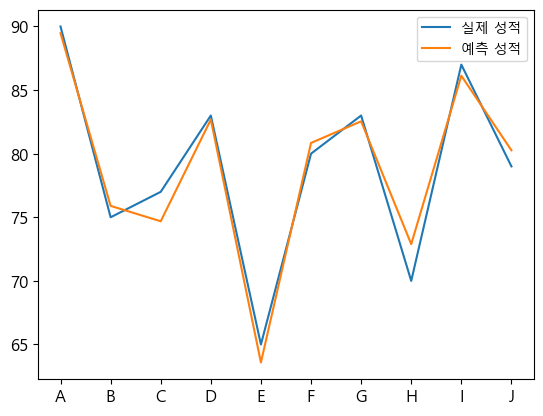

In [41]:
#예측값과 실제 값의 시각화 - 결정 계수가 높으므로 오차가 별로 없음
plt.figure()
plt.plot(df['score'], label='실제 성적')
plt.plot(result.predict(), label='예측 성적')
plt.xticks(range(0,10,1),df['name'])
plt.legend();
plt.show()


In [42]:
#VIF(분산 팽창 요인)출력
X = df.drop(['score', 'name'], axis = 1)
#print(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

   VIF Factor features
0        31.2       iq
1        13.4  academy
2         3.1     game
3         7.8       tv


In [44]:
#VIF(분산 팽창 요인)출력 - VIF가 높은 academy를 제거 하고 다시 출력
X = df.drop(['score', 'name', 'iq'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor features
0    1.528322  academy
1    2.655125     game
2    2.210794       tv


In [46]:
result = sm.ols(formula = 'score ~ iq + game + tv', data = df).fit()

print('절편과 기울기')
print(result.params)
print()
print('유의확률:' , result.pvalues)
print()
print('결정계수:' , result.rsquared)

절편과 기울기
Intercept    25.047397
iq            0.473669
game         -0.903660
tv           -1.823124
dtype: float64

유의확률: Intercept    0.071898
iq           0.001412
game         0.082017
tv           0.020863
dtype: float64

결정계수: 0.957351876527423


# 비선형 회귀

## boston 주택 가격에 Ridge 모델 적용

In [47]:
from sklearn.linear_model import Ridge

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

In [48]:
from sklearn.model_selection import cross_val_score #교차 검증
#적용할 규제 값
alphas = [0,0.1,1,10,100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target,
                                    scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))


alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


## KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor

#거리를 가지고 가중 평균을 구해서 예측
#uniform을 설정하면 일반 평균, distance - 가중 평균
regressor = KNeighborsRegressor(n_neighbors= 3, weights= 'distance')

#피처 와 레이블 생성
X_train = [
[0.5, 0.2, 0.1],
[0.9, 0.7, 0.3],
[0.4, 0.5, 0.7]
]
y_train = [5.0, 6.8, 9.0]
#모델 훈련
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [50]:
X_test = [
[0.2, 0.1, 0.7],
[0.4, 0.7, 0.6],
[0.5, 0.8, 0.1]
]
#예측
guesses = regressor.predict(np.array(X_test))
print(guesses)


[7.281 7.765 6.846]


## tree based model

In [51]:
#sample data 생성
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [52]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2, random_state=42)

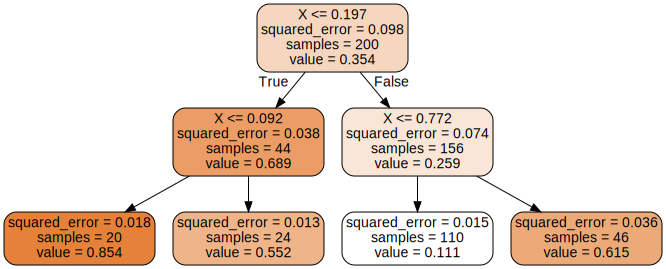

In [53]:
#트리 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
tree_reg,
out_file="decision_tree.dot",
feature_names=["X"],
class_names="y",
rounded=True,
filled=True
)

#화면 출력
with open('decision_tree.dot') as f:
    dot_graph = f.read()
    src = Source(dot_graph)
src


In [ ]:
from sklearn.tree import DecisionTreeRegressor
#terminal(자식이 없는 노드 - leaf node)의 개수가 10이상이어야 한다는 제약
#min_samples_leaf를 설정하게 되면 각 터미널의 depth가 일정하지 않을 수 있음
tree_reg = DecisionTreeRegressor(min_samples_leaf= 10, random_state= 42)

## svm

In [54]:
#시드 고정 후 가우시안 분포를 따르는 데이터셋을 만듭니다.
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
#ravel은 차원을 하나 줄이는 역할을 수행해주는 함수
#X 때문에 2차원 배열로 만들어지는 target은 1차원 배열이어야 해서 차월을 수정
#flatten 이나 reshape를 이용해서 조절을 해도 됨
y = (4+3*X+np.random.randn(m,1)).ravel()
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

In [55]:
# 모델 생성 과 훈련
from sklearn.svm import LinearSVR

# svm_reg = 마진이 큰 모형(epsilon=1.5)
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train,y_train)

LinearSVR(epsilon=1.5, random_state=42)

In [57]:
y_pred = svm_reg.predict(X_test)
print(y_test)
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse) #주로 mse보다 rmse 사용

[4.513 7.328 5.684 8.938 4.744 7.473 6.786 7.449 6.751 5.622]
[4.211 6.489 3.676 9.018 5.046 7.511 5.369 6.641 6.804 4.594]
0.8647820915346441
0.9299366061913275


In [58]:
#margin을 줄인 모형
svm_reg = LinearSVR(epsilon=0.5, random_state=42)
svm_reg.fit(X_train,y_train)

y_pred = svm_reg.predict(X_test)
print(y_test)
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse) #주로 mse보다 rmse 사용

[4.513 7.328 5.684 8.938 4.744 7.473 6.786 7.449 6.751 5.622]
[4.588 6.941 4.035 9.552 5.45  7.996 5.784 7.098 7.266 4.984]
0.5824310463265733
0.7631717017333474


In [60]:
# 비선형 데이터 생성
np.random.seed(42)
m = 100
X = 2* np.random.rand(m,1) -1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m,1) / 10).ravel()
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]

0.4055248767954734


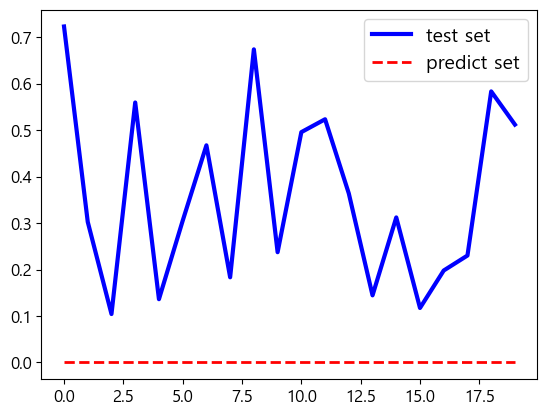

In [61]:
#선형 svm 적용
# svm_reg = 마진이 큰 모형(epsilon=1.5)
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train,y_train)

# 예측 및 결과 비교
y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

plt.plot(y_test, "b-", linewidth=3, label="test set")
plt.plot(y_pred, "r--", linewidth=2, label="predict set")
plt.legend(loc="upper right", fontsize=14)
plt.show()


In [ ]:
#비선형 SVM 적용
from sklearn.svm import SVR

#비선형은 작은 eplison 값 사용
#kernel -> sigmoid / poly / etc
#random state X
#sample data를 2차 방정식으로 만들었기 때문에 현재는 degree가 2인 경우가 가장 잘 예측
#sample data를 알지 못한다면 degree는 hyper paraemter tuning 해야함
svm_poly_reg = SVR(kernel='poly', gamma='auto', degree=2, C=10, epsilon=0.1)
svm_poly_reg.fit(X_train,y_train)

# 예측 및 결과 비교
y_pred = svm_poly_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

plt.plot(y_test, "b-", linewidth=3, label="test set")
plt.plot(y_pred, "r--", linewidth=2, label="predict set")
plt.legend(loc="upper right", fontsize=14)
plt.show()

In [63]:
# 데이터 생성
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X[:5], y[:5]

(array([[ 0.831, -0.259],
        [ 1.185,  0.92 ],
        [ 1.164, -0.456],
        [-0.024,  1.086],
        [ 0.481,  1.509]]),
 array([1, 0, 1, 0, 0], dtype=int64))